In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/research-analysis/master_combined_df_40_random.csv
/kaggle/input/research-analysis/master_combined_df_30_random.csv
/kaggle/input/research-analysis/master_combined_df_45_random.csv
/kaggle/input/research-analysis/master_combined_df_25_normal.csv
/kaggle/input/research-analysis/master_combined_df_40_grid.csv
/kaggle/input/research-analysis/master_combined_df_10_random.csv
/kaggle/input/research-analysis/master_combined_df_35_normal.csv
/kaggle/input/research-analysis/master_combined_df_45_normal.csv
/kaggle/input/research-analysis/master_combined_df_40_normal.csv
/kaggle/input/research-analysis/master_combined_df_20_grid.csv
/kaggle/input/research-analysis/master_combined_df_50_grid.csv
/kaggle/input/research-analysis/master_combined_df_5_normal.csv
/kaggle/input/research-analysis/master_combined_df_35_random.csv
/kaggle/input/research-analysis/master_combined_df_25_grid.csv
/kaggle/input/research-analysis/master_combined_df_50_random.csv
/kaggle/input/research-analysis/ma

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
df1 = pd.read_csv('/kaggle/input/research-analysis/master_combined_df_10_normal.csv')
df1['Type'] = 'normal'
df2 = pd.read_csv('/kaggle/input/research-analysis/master_combined_df_10_grid.csv')
df2['Type'] = 'grid'
df3 = pd.read_csv('/kaggle/input/research-analysis/master_combined_df_10_random.csv')
df3['Type'] = 'random'
df = pd.concat([df1,df2,df3],axis = 0, keys = ['normal','grid','random'])
#df = pd.read_csv('/kaggle/input/research-analysis/master_combined_df_10_grid.csv')
df.rename(columns = {'Unnamed: 0':'Ticker'}, inplace = True)



In [7]:
df.shape

(390, 40)

In [8]:
df.Ticker.unique()

array(['AAPL', 'AMD', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NFLX', 'NVDA',
       'SPY', 'TSLA'], dtype=object)

In [9]:
df.columns

Index(['Ticker', 'Unnamed: 1', 'Model', 'Accuracy', 'Confusion Matrix',
       'Start', 'End', 'Duration', 'Exposure Time [%]', 'Equity Final [$]',
       'Equity Peak [$]', 'Return [%]', 'Buy & Hold Return [%]',
       'Return (Ann.) [%]', 'Volatility (Ann.) [%]', 'CAGR [%]',
       'Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio', 'Alpha [%]', 'Beta',
       'Max. Drawdown [%]', 'Avg. Drawdown [%]', 'Max. Drawdown Duration',
       'Avg. Drawdown Duration', '# Trades', 'Win Rate [%]', 'Best Trade [%]',
       'Worst Trade [%]', 'Avg. Trade [%]', 'Max. Trade Duration',
       'Avg. Trade Duration', 'Profit Factor', 'Expectancy [%]', 'SQN',
       'Kelly Criterion', '_strategy', '_equity_curve', '_trades', 'Type'],
      dtype='object')

In [10]:
pd.set_option('display.max_columns',None)

In [11]:
df[df["Return [%]"] > df['Buy & Hold Return [%]']].Ticker.value_counts()

Ticker
TSLA     38
AMD      37
META     24
AMZN     12
SPY      11
MSFT      6
AAPL      5
GOOGL     3
NFLX      3
NVDA      3
Name: count, dtype: int64

In [12]:
df = df[df.Ticker == 'AMZN']
data = df[['Type','Ticker','Model','Accuracy','Return [%]','Buy & Hold Return [%]','Sharpe Ratio']]

data.reset_index(inplace = True,drop = True)
data.loc[12,'Accuracy'] = 1
data.loc[25,'Accuracy'] = 1
data.loc[38,'Accuracy'] = 1

In [13]:
data.head(2)

,Type,Ticker,Model,Accuracy,Return [%],Buy & Hold Return [%],Sharpe Ratio
0,normal,AMZN,Logistic Regression,0.844828,1.256575,35.731871,0.018146
1,normal,AMZN,Random Forest,0.881963,23.536660,35.731871,0.284373


In [14]:
best_models = data.loc[data.groupby('Model')['Accuracy'].idxmax()]

In [15]:
best_models

,Type,Ticker,Model,Accuracy,Return [%],Buy & Hold Return [%],Sharpe Ratio
12,normal,AMZN,Actual,1.000000,120.638536,35.731871,0.943286
21,grid,AMZN,AdaBoost,0.885942,81.037959,35.731871,0.795253
20,grid,AMZN,Decision Tree,0.863395,23.007578,35.731871,0.278595
31,random,AMZN,Gradient Boosting,0.875332,0.595096,35.731871,0.007724
19,grid,AMZN,K-Nearest Neighbors,0.895225,45.789269,35.731871,0.484571
11,normal,AMZN,LGBMClassifier,0.891247,20.588113,35.731871,0.235114
13,grid,AMZN,Logistic Regression,0.858090,17.299766,35.731871,0.226636
23,grid,AMZN,MLP,0.899204,19.074678,35.731871,0.228818
4,normal,AMZN,Naive Bayes,0.785146,4.980027,35.731871,0.081889
14,grid,AMZN,Random Forest,0.893899,60.965255,35.731871,0.623275


In [16]:
best_models.sort_values(by = 'Accuracy',ascending = False)

,Type,Ticker,Model,Accuracy,Return [%],Buy & Hold Return [%],Sharpe Ratio
12,normal,AMZN,Actual,1.000000,120.638536,35.731871,0.943286
23,grid,AMZN,MLP,0.899204,19.074678,35.731871,0.228818
19,grid,AMZN,K-Nearest Neighbors,0.895225,45.789269,35.731871,0.484571
14,grid,AMZN,Random Forest,0.893899,60.965255,35.731871,0.623275
11,normal,AMZN,LGBMClassifier,0.891247,20.588113,35.731871,0.235114
16,grid,AMZN,SVM,0.888594,25.273013,35.731871,0.311412
21,grid,AMZN,AdaBoost,0.885942,81.037959,35.731871,0.795253
35,random,AMZN,SGD Classifier,0.884615,18.921370,35.731871,0.237091
31,random,AMZN,Gradient Boosting,0.875332,0.595096,35.731871,0.007724
20,grid,AMZN,Decision Tree,0.863395,23.007578,35.731871,0.278595


In [17]:
best_models.sort_values(by = ['Return [%]','Accuracy'],ascending = False)

,Type,Ticker,Model,Accuracy,Return [%],Buy & Hold Return [%],Sharpe Ratio
12,normal,AMZN,Actual,1.000000,120.638536,35.731871,0.943286
21,grid,AMZN,AdaBoost,0.885942,81.037959,35.731871,0.795253
14,grid,AMZN,Random Forest,0.893899,60.965255,35.731871,0.623275
19,grid,AMZN,K-Nearest Neighbors,0.895225,45.789269,35.731871,0.484571
16,grid,AMZN,SVM,0.888594,25.273013,35.731871,0.311412
20,grid,AMZN,Decision Tree,0.863395,23.007578,35.731871,0.278595
11,normal,AMZN,LGBMClassifier,0.891247,20.588113,35.731871,0.235114
23,grid,AMZN,MLP,0.899204,19.074678,35.731871,0.228818
35,random,AMZN,SGD Classifier,0.884615,18.921370,35.731871,0.237091
13,grid,AMZN,Logistic Regression,0.858090,17.299766,35.731871,0.226636


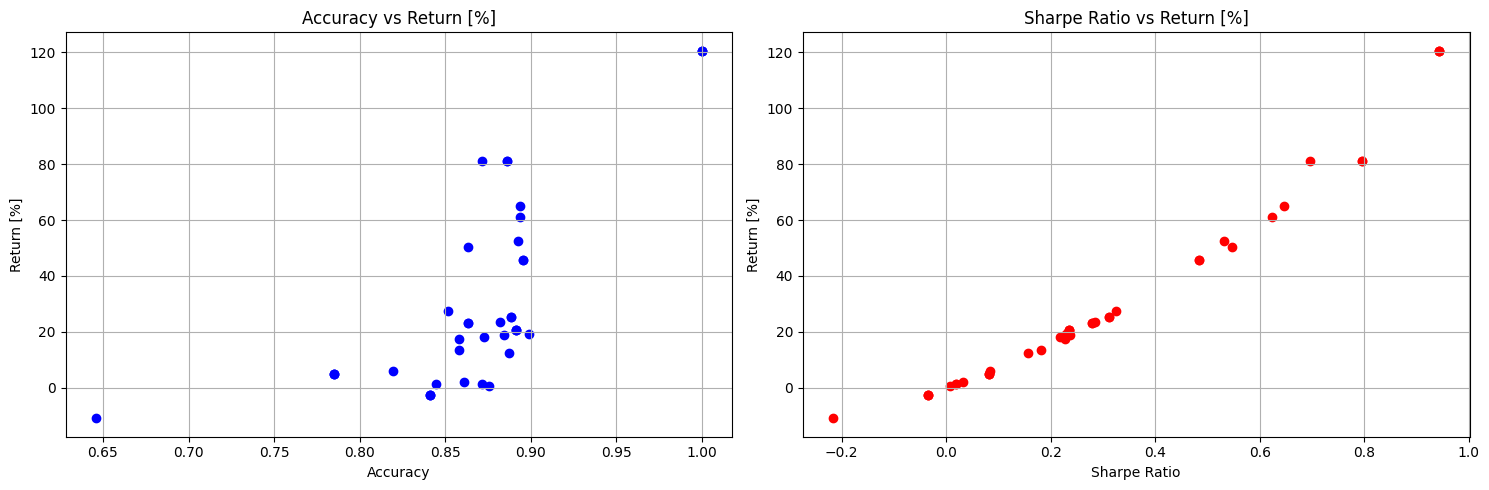

In [18]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy vs Return [%]
axes[0].scatter(data['Accuracy'], data['Return [%]'], color='b', label='Return vs Accuracy')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Return [%]')
axes[0].set_title('Accuracy vs Return [%]')
axes[0].grid(True)

# Plot 2: Sharpe Ratio vs Return [%]
axes[1].scatter(data['Sharpe Ratio'], data['Return [%]'], color='r', label='Return vs Sharpe Ratio')
axes[1].set_xlabel('Sharpe Ratio')
axes[1].set_ylabel('Return [%]')
axes[1].set_title('Sharpe Ratio vs Return [%]')
axes[1].grid(True)

plt.tight_layout()
plt.show()

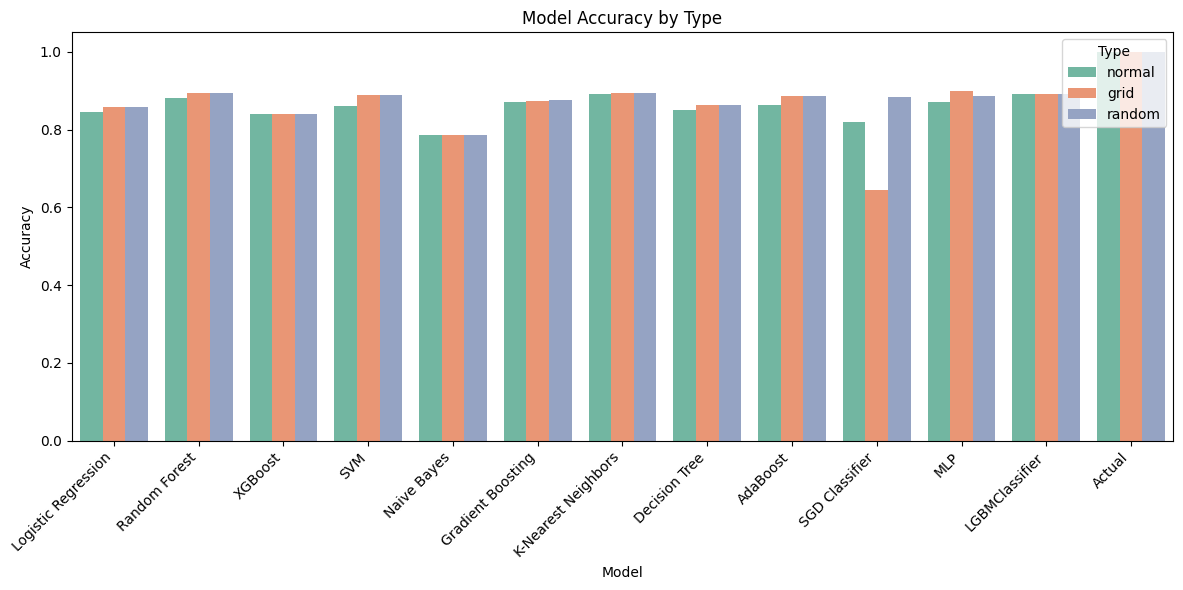

In [19]:
# Plotting using seaborn barplot
plt.figure(figsize=(12, 6))

# Create a barplot for Accuracy, grouped by Type and showing each Model
sns.barplot(data=data, x="Model", y="Accuracy", hue="Type", palette="Set2")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Type')

# Show the plot
plt.tight_layout()
plt.show()

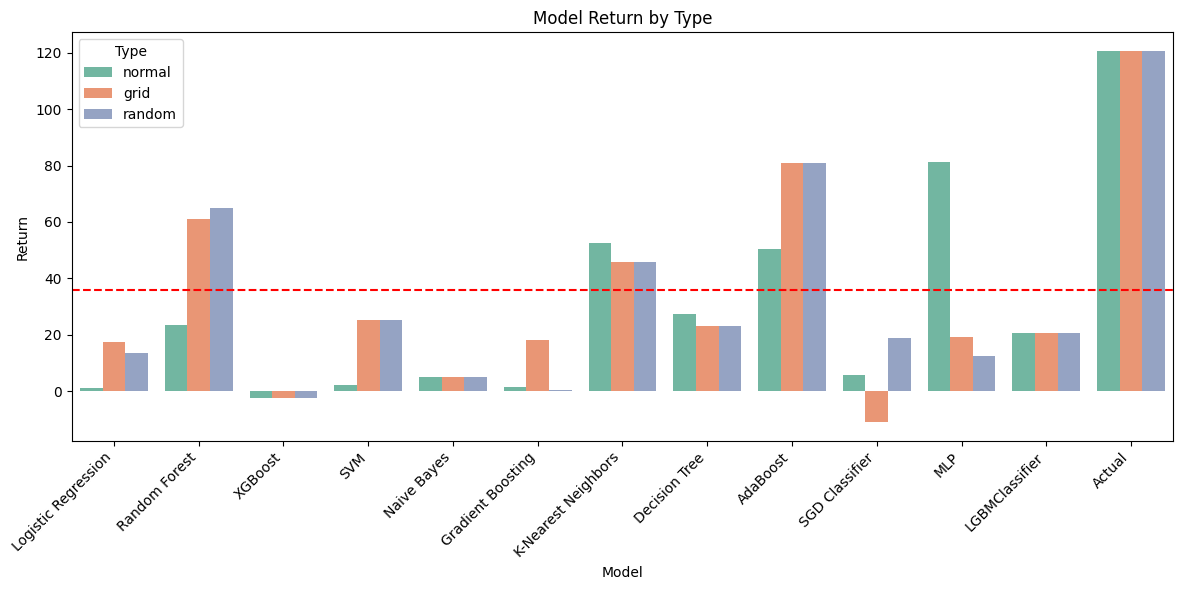

In [20]:
# Plotting using seaborn barplot
plt.figure(figsize=(12, 6))

# Create a barplot for Accuracy, grouped by Type and showing each Model
sns.barplot(data=data, x="Model", y="Return [%]", hue="Type", palette="Set2")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.axhline(y=df['Buy & Hold Return [%]'].mean(), color='r', linestyle='--', label='Buy & Hold Return [%]')
# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Return')
plt.title('Model Return by Type')

# Show the plot
plt.tight_layout()
plt.show()

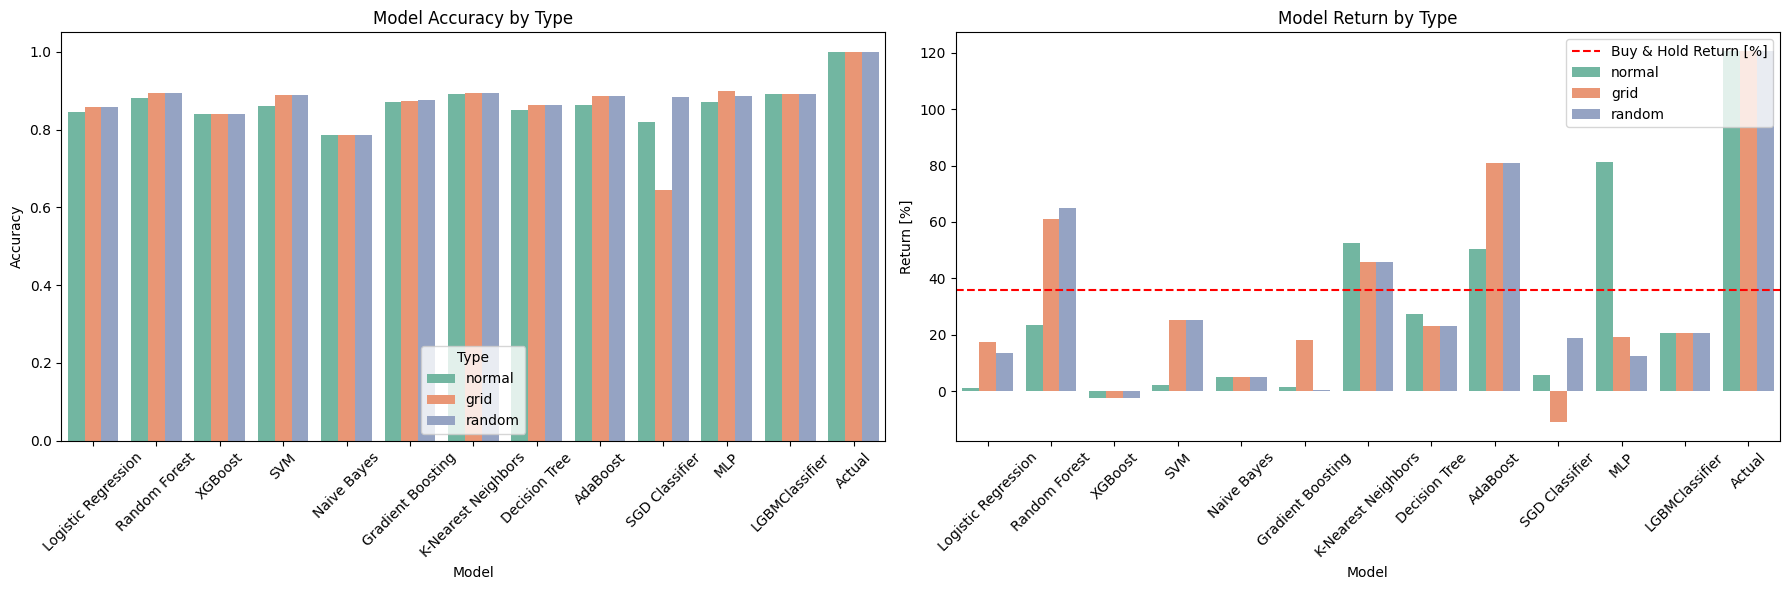

In [21]:
# Plotting using subplots to plot both barplots in the same figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot for Accuracy
sns.barplot(data=data, x="Model", y="Accuracy", hue="Type", palette="Set2", ax=axes[0])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy by Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Return [%]
sns.barplot(data=data, x="Model", y="Return [%]", hue="Type", palette="Set2", ax=axes[1])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Return [%]')
axes[1].set_title('Model Return by Type')
axes[1].tick_params(axis='x', rotation=45)

# Adding Buy & Hold Return baseline on the second plot (Return [%])
axes[1].axhline(y=data['Buy & Hold Return [%]'].mean(), color='r', linestyle='--', label='Buy & Hold Return [%]')
axes[1].legend(loc='upper right')

# Adjust layout to make sure there's no overlap
plt.tight_layout()
plt.show()

In [22]:
data[data['Return [%]'] > data['Buy & Hold Return [%]']].Model.value_counts()

Model
K-Nearest Neighbors    3
AdaBoost               3
Actual                 3
Random Forest          2
MLP                    1
Name: count, dtype: int64

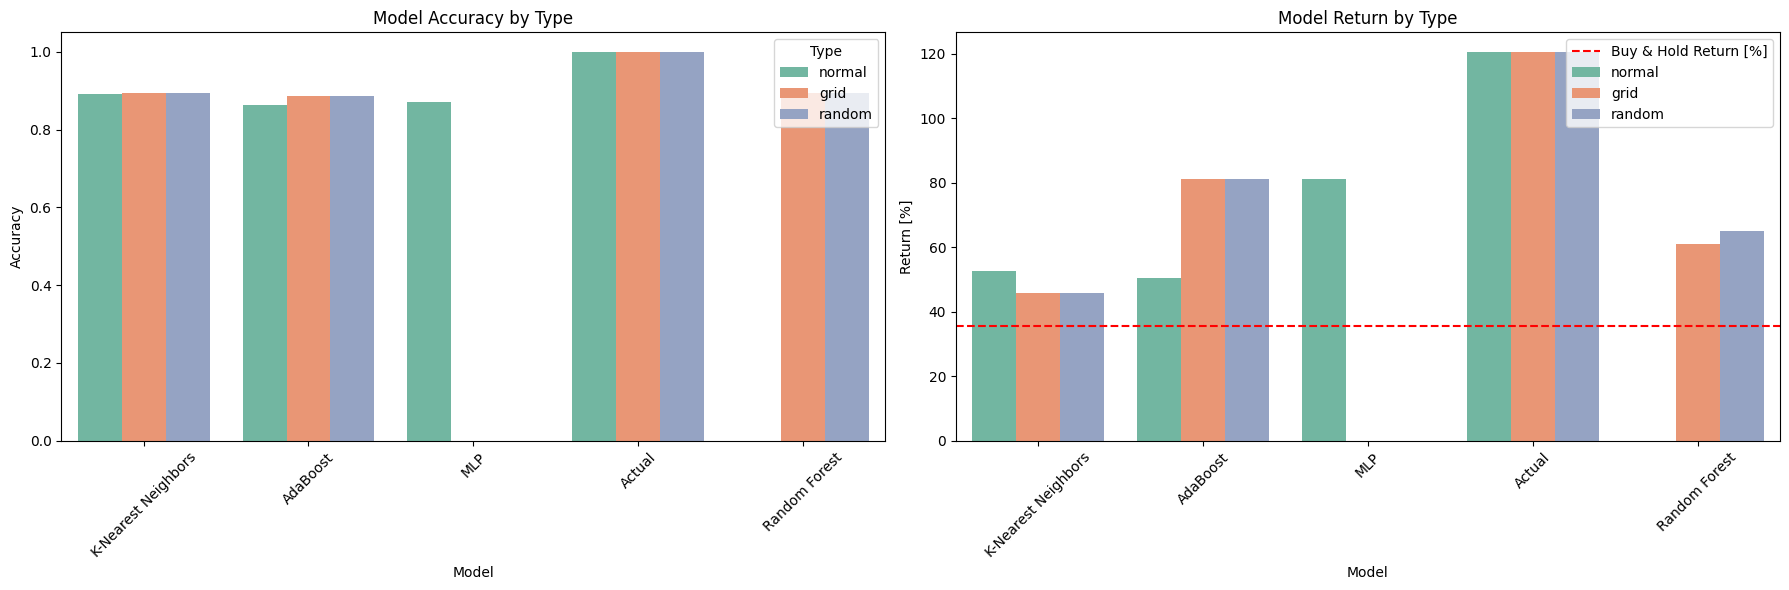

In [23]:
# Plotting using subplots to plot both barplots in the same figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot for Accuracy
sns.barplot(data=data[data['Return [%]'] > data['Buy & Hold Return [%]']], x="Model", y="Accuracy", hue="Type", palette="Set2", ax=axes[0])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy by Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Return [%]
sns.barplot(data=data[data['Return [%]'] > data['Buy & Hold Return [%]']], x="Model", y="Return [%]", hue="Type", palette="Set2", ax=axes[1])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Return [%]')
axes[1].set_title('Model Return by Type')
axes[1].tick_params(axis='x', rotation=45)

# Adding Buy & Hold Return baseline on the second plot (Return [%])
axes[1].axhline(y=data['Buy & Hold Return [%]'].mean(), color='r', linestyle='--', label='Buy & Hold Return [%]')
axes[1].legend(loc='upper right')

# Adjust layout to make sure there's no overlap
plt.tight_layout()
plt.show()

In [28]:
df._equity_curve[0].strip().split('')

<ipython-input-28-5152a0991157>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df._equity_curve[0].strip()


'Equity  DrawdownPct DrawdownDuration\nDate                                                  \n2022-02-25  10000.000000     0.000000              NaT\n2022-02-28  10000.000000     0.000000              NaT\n2022-03-01  10000.000000     0.000000              NaT\n2022-03-02  10000.000000     0.000000              NaT\n2022-03-03  10000.000000     0.000000              NaT\n...                  ...          ...              ...\n2025-02-21  10125.657532     0.061364              NaT\n2025-02-24  10125.657532     0.061364              NaT\n2025-02-25  10125.657532     0.061364              NaT\n2025-02-26  10125.657532     0.061364              NaT\n2025-02-27  10125.657532     0.061364        1066 days\n\n[754 rows x 3 columns]'

In [24]:
data

,Type,Ticker,Model,Accuracy,Return [%],Buy & Hold Return [%],Sharpe Ratio
0,normal,AMZN,Logistic Regression,0.844828,1.256575,35.731871,0.018146
1,normal,AMZN,Random Forest,0.881963,23.536660,35.731871,0.284373
2,normal,AMZN,XGBoost,0.840849,-2.522218,35.731871,-0.034027
3,normal,AMZN,SVM,0.860743,2.219514,35.731871,0.031431
4,normal,AMZN,Naive Bayes,0.785146,4.980027,35.731871,0.081889
5,normal,AMZN,Gradient Boosting,0.871353,1.481083,35.731871,0.019008
6,normal,AMZN,K-Nearest Neighbors,0.892573,52.555382,35.731871,0.531185
7,normal,AMZN,Decision Tree,0.851459,27.313393,35.731871,0.325141
8,normal,AMZN,AdaBoost,0.863395,50.502196,35.731871,0.546815
9,normal,AMZN,SGD Classifier,0.819629,5.811753,35.731871,0.084323
